This Project uses the corn data set in the woolridge package to perform a kmeans cluster analysis. 

In [ ]:
pip install wooldridge

In [ ]:
import wooldridge

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
corn = wooldridge.data('corn')

In [ ]:
corn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   county   37 non-null     int64  
 1   cornhec  37 non-null     float64
 2   soyhec   37 non-null     float64
 3   cornpix  37 non-null     int64  
 4   soypix   37 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.6 KB


# EDA

In [ ]:
corn

,county,cornhec,soyhec,cornpix,soypix
0,1,165.759995,8.090000,374,55
1,2,96.320000,106.029999,209,218
2,3,76.080002,103.599998,253,250
3,4,185.350006,6.470000,432,96
4,4,116.430000,63.820000,367,178
5,5,162.080002,43.500000,361,137
6,5,152.039993,71.430000,288,206
7,5,161.750000,42.490002,369,165
8,6,92.879997,105.260002,206,218
9,6,149.940002,76.489998,316,221


In [ ]:
# Number of different counties in the data
 
corn['county'].nunique()

12

In [ ]:
# Creates a data frame of the corn and soy variables
 
corn_xVar = corn[['cornhec', 'soyhec', 'cornpix', 'soypix']]

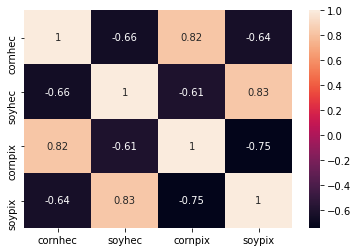

In [ ]:
# Heatmap of the correlation among the variables
 
sns.heatmap(corn_xVar.corr(),annot = True)

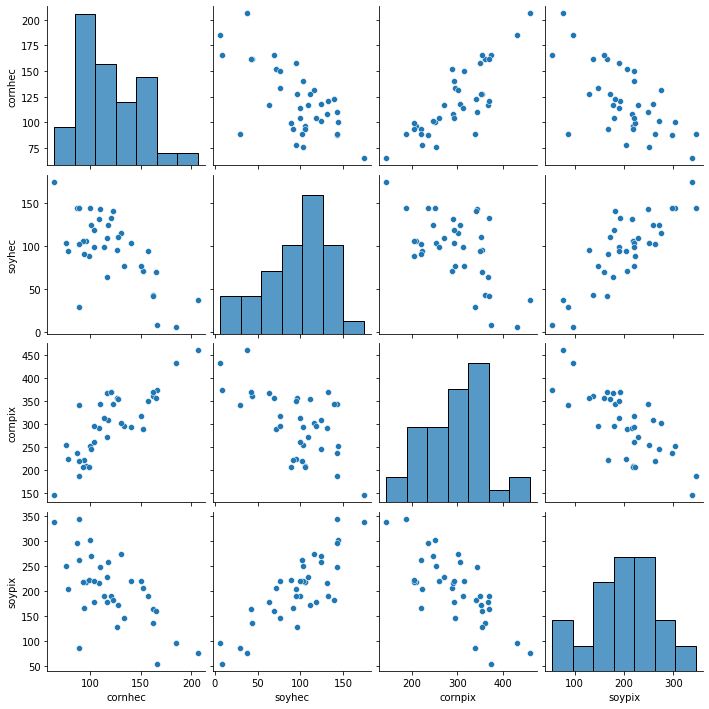

In [ ]:
# pairplot of the variables
 
sns.pairplot(corn_xVar)

# Kmeans Model

In [ ]:
from sklearn.cluster import KMeans
corn_Cluster = KMeans(n_clusters=3)

In [ ]:
corn_Cluster.fit(corn_xVar)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = corn_Cluster.labels_
labels = labels.reshape(37,1)

In [ ]:
corn['label'] = labels

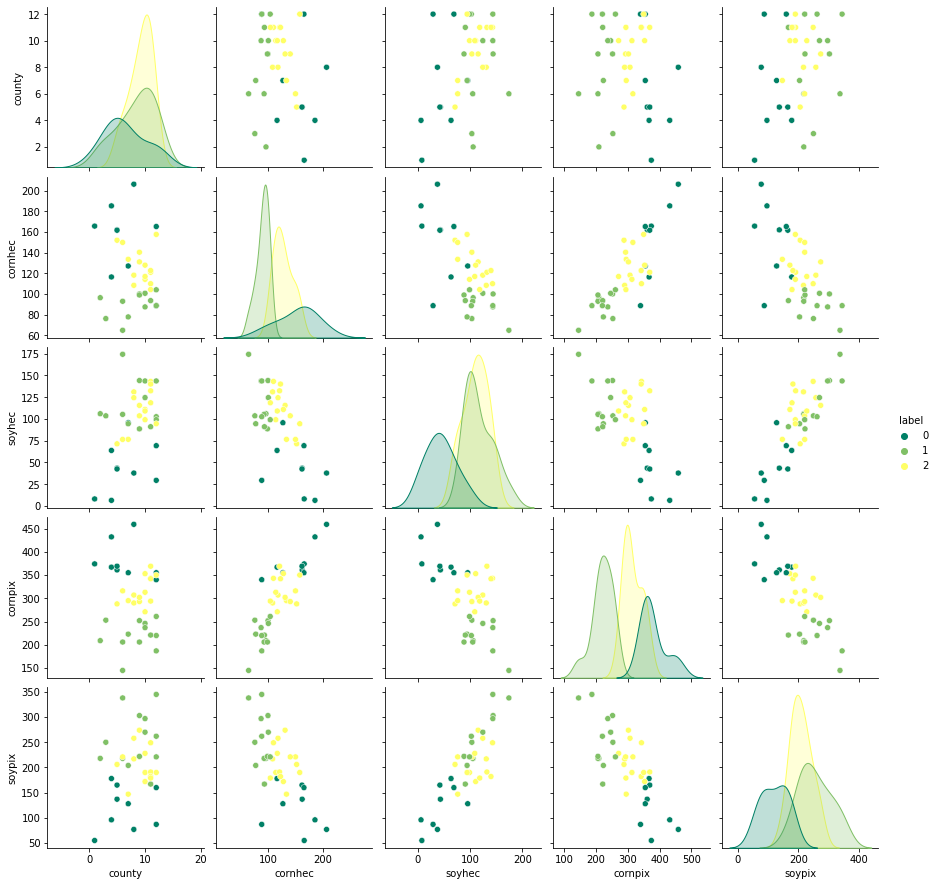

In [ ]:
sns.pairplot(corn, vars=corn.columns[:-1], hue="label", palette='summer')

## EDA with Dash

In [ ]:
import plotly.express as px
scatter = px.scatter_matrix(corn,
    dimensions=["cornhec", "soyhec", "cornpix", "soypix"],
    color="label")

In [ ]:
!pip install jupyter-dash
!pip install pyngrok

In [ ]:
# Dashboard with Dash
 
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from pyngrok import ngrok
 
app = JupyterDash(__name__)
 
app.layout = html.Div([
    dcc.Graph(figure=scatter),
])
 
app.run_server(mode='external')

Dash app running on:


<IPython.core.display.Javascript object>

In [ ]:
! ngrok authtoken 1vXlcIP1hk2NmY9UBuuSHU5gLHX_72emhyJmaGcTmoF6TQfKk

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
# Create a public url with ngrok

public_url = ngrok.connect(addr = '8050')

In [ ]:
public_url

<NgrokTunnel: "http://b43ee3013b30.ngrok.io" -> "http://localhost:8050">

In [ ]:
ngrok.kill()

# Saving the model and data

In [ ]:
from google.colab import drive
 
drive.mount('drive')

Mounted at drive


In [ ]:
import joblib

In [ ]:
# Save the model to Drive
joblib.dump(corn_Cluster,'/content/drive/MyDrive/Projects/Corn_UnsupervisedClustering/corn_Cluster.joblib')

['/content/drive/MyDrive/Projects/Corn_UnsupervisedClustering/corn_Cluster.joblib']

In [ ]:
# Save the data to Drive

corn.to_csv('corn.csv')
!cp corn.csv "drive/My Drive/Projects/Corn_UnsupervisedClustering/"

# Loading the model and running it on new data

In [ ]:
from google.colab import drive
 
drive.mount('drive')

In [ ]:
import joblib
import pandas as pd
import numpy as np

In [ ]:
# Load the model
loaded_Km = joblib.load('/content/drive/MyDrive/Projects/Corn_UnsupervisedClustering/corn_Cluster.joblib')

In [ ]:
# Load the data
corn=pd.read_csv('/content/drive/My Drive/Projects/Corn_UnsupervisedClustering/corn.csv')
corn = corn.drop(['Unnamed: 0', 'label'], axis=1)

In [ ]:
# New data for county 13
new_data = pd.DataFrame([[13, 112.55, 91.455, 216, 224], [13, 122.761, 99.762, 229, 225]],columns=['county', 'cornhec', 'soyhec', 'cornpix', 'soypix'])

In [ ]:
new_data

,county,cornhec,soyhec,cornpix,soypix
0,13,112.550,91.455,216,224
1,13,122.761,99.762,229,225


In [ ]:
frames = [corn, new_data]
corn = pd.concat(frames)

In [ ]:
corn

,county,cornhec,soyhec,cornpix,soypix
0,1,165.759995,8.090000,374,55
1,2,96.320000,106.029999,209,218
2,3,76.080002,103.599998,253,250
3,4,185.350006,6.470000,432,96
4,4,116.430000,63.820000,367,178
5,5,162.080002,43.500000,361,137
6,5,152.039993,71.430000,288,206
7,5,161.750000,42.490002,369,165
8,6,92.879997,105.260002,206,218
9,6,149.940002,76.489998,316,221


In [ ]:
corn_xVar = corn[['cornhec', 'soyhec', 'cornpix', 'soypix']]

In [ ]:
loaded_Km.fit(corn_xVar)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = loaded_Km.labels_
labels = labels.reshape(len(corn),1)

In [ ]:
corn['label'] = labels

In [ ]:
corn

,county,cornhec,soyhec,cornpix,soypix,label
0,1,165.759995,8.090000,374,55,2
1,2,96.320000,106.029999,209,218,0
2,3,76.080002,103.599998,253,250,0
3,4,185.350006,6.470000,432,96,2
4,4,116.430000,63.820000,367,178,2
5,5,162.080002,43.500000,361,137,2
6,5,152.039993,71.430000,288,206,1
7,5,161.750000,42.490002,369,165,2
8,6,92.879997,105.260002,206,218,0
9,6,149.940002,76.489998,316,221,1


In [ ]:
!pip install jupyter-dash
!pip install pyngrok

In [ ]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from pyngrok import ngrok

In [ ]:
scatter = px.scatter_matrix(corn,
    dimensions=["cornhec", "soyhec", "cornpix", "soypix"],
    color="label")

In [ ]:
app = JupyterDash(__name__)
 
app.layout = html.Div([
    dcc.Graph(figure=scatter),
])
 
app.run_server(mode='external')

Dash app running on:


<IPython.core.display.Javascript object>

In [ ]:
! ngrok authtoken 1vXlcIP1hk2NmY9UBuuSHU5gLHX_72emhyJmaGcTmoF6TQfKk

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
public_url = ngrok.connect(addr = '8050')

In [ ]:
public_url

<NgrokTunnel: "http://2034fe2a7ecd.ngrok.io" -> "http://localhost:8050">

In [ ]:
ngrok.kill()